<a href="https://colab.research.google.com/github/charlie-paterson/CognoRise-Infotech/blob/main/Iris/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, f1_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

## Loading Dataset

In [17]:
df = pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Visualisations

In [18]:
df_copy = df.copy()

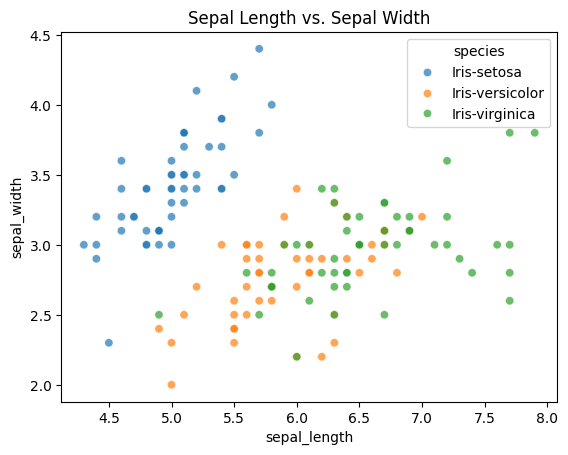

In [19]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df_copy, alpha=0.7)
plt.title('Sepal Length vs. Sepal Width')
plt.show()

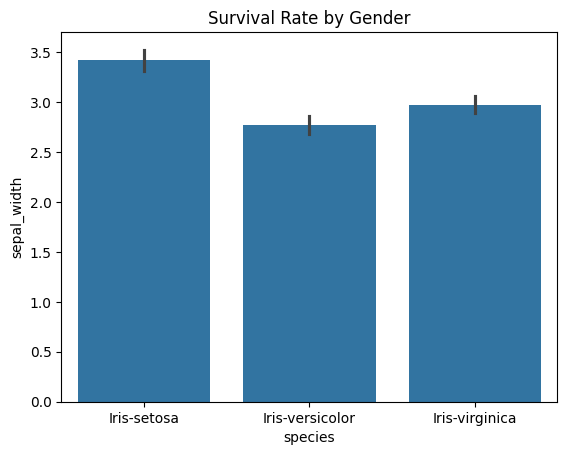

In [20]:
sns.barplot(x='species', y='sepal_width', data=df_copy)
plt.title('Survival Rate by Gender')
plt.show()

## Cleaning Data

In [21]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [22]:
print(len(df))

150


## Encoding Data

In [23]:
label = preprocessing.LabelEncoder()

In [24]:
label.fit(df.species)
df.species = label.transform(df.species)

## Feature Engineering

In [25]:
df['sepal_area'] = df['sepal_length'] * df['sepal_width']
df['petal_area'] = df['petal_length'] * df['petal_width']
df['widths'] = df['petal_width'] + df['sepal_width']

## Correlation Heatmap

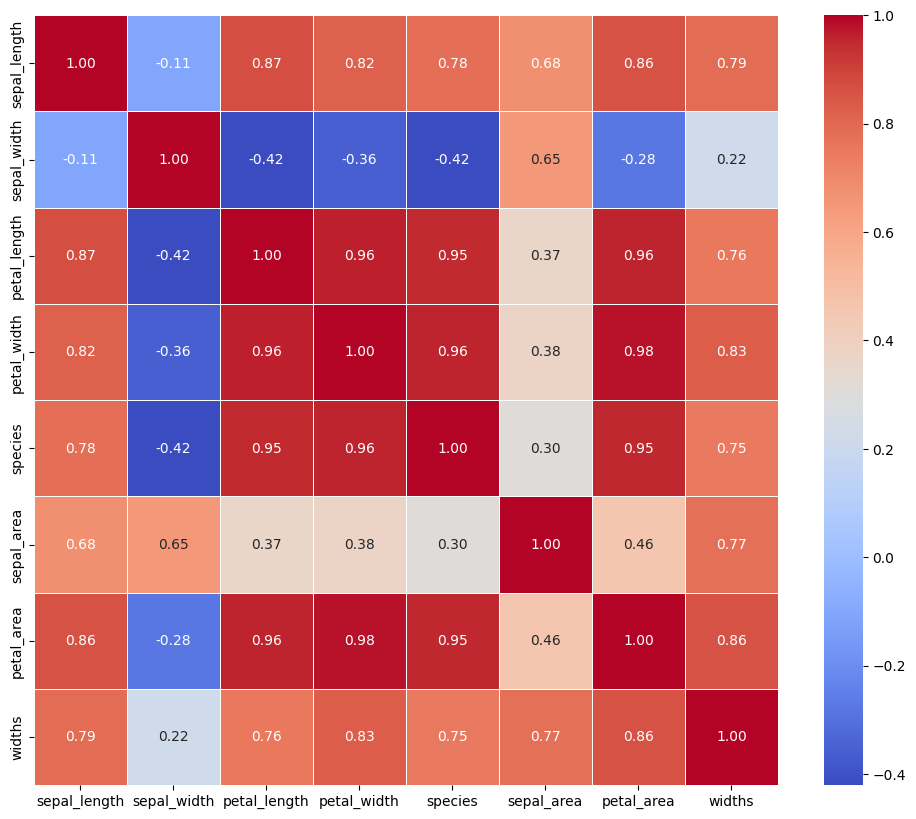

In [26]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

## Training

In [27]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_area', 'petal_area']
X = df[features]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
X_train_array = np.asarray(X_train, dtype='float')
y_train_array = np.asarray(y_train, dtype='int')
X_test_array = np.asarray(X_test, dtype='float')
y_test_array = np.asarray(y_test, dtype='int')

### Random Forest Classifier

In [29]:
rf = RandomForestClassifier(random_state=365)
rf.fit(X_train_array, y_train_array)
y_pred_rf = rf.predict(X_test_array)

In [30]:
cm = confusion_matrix(y_test_array, y_pred_rf)
print("Confusion Matrix: ")
print(" ")
print(cm)
print(" ")
cr_rf = classification_report(y_test_array, y_pred_rf)
print("Classification Report: ")
print(cr_rf)
print(" ")
acc_score_rf = accuracy_score(y_test_array, y_pred_rf)
print(f"Accuracy: {np.round(acc_score_rf, 2)}")

Confusion Matrix: 
 
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
 
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

 
Accuracy: 1.0


### Gradient Boosting Classifier

In [31]:
gb = GradientBoostingClassifier()
gb.fit(X_train_array, y_train_array)
y_pred_gb = gb.predict(X_test_array)

In [32]:
cm = confusion_matrix(y_test_array, y_pred_gb)
print("Confusion Matrix: ")
print(" ")
print(cm)
print(" ")
cr_rf = classification_report(y_test_array, y_pred_gb)
print("Classification Report: ")
print(cr_rf)
print(" ")
acc_score_rf = accuracy_score(y_test_array, y_pred_gb)
print(f"Accuracy: {np.round(acc_score_rf, 2)}")

Confusion Matrix: 
 
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
 
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

 
Accuracy: 0.97


## Actual vs. Predicted

In [33]:
comparison_df = pd.DataFrame({'Actual': y_test_array, 'Predicted': y_pred_rf})
print("\nComparison of Actual vs Predicted Labels:")
print(comparison_df)


Comparison of Actual vs Predicted Labels:
    Actual  Predicted
0        1          1
1        0          0
2        2          2
3        1          1
4        1          1
5        0          0
6        1          1
7        2          2
8        1          1
9        1          1
10       2          2
11       0          0
12       0          0
13       0          0
14       0          0
15       1          1
16       2          2
17       1          1
18       1          1
19       2          2
20       0          0
21       2          2
22       0          0
23       2          2
24       2          2
25       2          2
26       2          2
27       2          2
28       0          0
29       0          0
30       0          0
31       0          0
32       1          1
33       0          0
34       0          0
35       2          2
36       1          1
37       0          0


In [34]:
import numpy as np

# Assuming y_test and y_pred are your actual and predicted labels
correct_predictions = np.sum(y_test_array == y_pred_rf)
total_predictions = len(y_test)

print(f"Total number of correct predictions: {correct_predictions}")
print(f"Total number of predictions: {total_predictions}")

Total number of correct predictions: 38
Total number of predictions: 38
